In [224]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from urllib import request as rq
import urllib
import re
import math
import os
import csv
import time
import json
import pickle
import sys
import requests
from scipy import stats
from math import log
from sklearn.cross_decomposition import PLSRegression
from sklearn import linear_model
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

/var/www/Repositories/oscars/models


In [249]:
# use AA_bestpictures_Liam_Kimiko_clean.csv
# datacsv = open("AA_bestpictures_Liam_Kimiko_clean.csv")

# this version has removed duplicates and financial data
datacsv = open("../AA_4_computed_new.csv")

reader = list(csv.reader(datacsv, delimiter=',', quotechar='"'))

fields = [x.strip() for x in reader.pop(0)]

frame = pd.DataFrame(reader, columns=fields).fillna(0).values
# print(fields)
used_fields = fields[5:7] + [fields[8]] + [fields[10]] + [fields[-6]] + [fields[-4]] + [fields[-1]]
print(used_fields)

X = pd.DataFrame(frame[:,[5,6,8,10,-6,-4,-1]]).convert_objects(convert_numeric=True).fillna(0).values
# print(X)
Y = []

X = np.array(X).T # get the columns

# some transformations we were exploring
X[1] = np.log(X[1]+1) # votes

# X[3] = np.log(np.sqrt(10-X[3]+.01)+.01) # rotten tomatoes rating
# X[5] = np.log(np.sqrt(10-X[5]+.01)+.01) # rotten tomatoes rating

# X[2] = np.log(np.sqrt(100-X[2]+1)+.01) # no longer in reg 
# X[4] = np.log(np.sqrt(100-X[4]+1)+.01) # no longer in reg

# scale the data
X = np.array([(row - row.min()) / (row.max()-row.min()) for row in X])

X = X.T # convert back to rows
X = list(X)
for x in reader:
    ret = 0
    if x[2].strip() == "True":
        ret = 1
    Y.append(ret)

XTest = X[-100:]
YTest = Y[-100:]
XTrain = X[:-100]
YTrain = Y[:-100]
logreg = linear_model.LogisticRegression(fit_intercept=True,max_iter=1000)
logreg.fit(XTrain, YTrain)

['IMDB Rating', 'IMDB Votes', 'Average Critic Score', 'Average Audience Score', 'Production Budget', 'Worldwide Gross', 'Return on Investment']


/home/liam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [238]:
# print(StatsOnly)
stats.describe(X)

DescribeResult(nobs=520, minmax=(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])), mean=array([ 0.75353846,  0.65861352,  0.79941296,  0.83123932,  0.03313351,
        0.02978177,  0.02176795]), variance=array([ 0.00619593,  0.03808063,  0.01800893,  0.00750673,  0.00627198,
        0.00584901,  0.0044857 ]), skewness=array([-2.87654726, -0.82473388, -3.03459644, -3.61722973,  5.58007109,
        6.98170017,  9.95254055]), kurtosis=array([  20.28020022,    0.51414413,   15.03010324,   31.0255276 ,
         48.79853048,   70.3481014 ,  124.66472061]))

In [239]:
score = logreg.score(XTest, YTest)
print("Our regression has an accuracy of %s%%" % (score*100))


preds =  logreg.predict(XTest)
corr = 0
for o,e in zip(preds,YTest):
    if o == e and o == 1:
        corr += 1
winners = [y for y in YTest if y == 1]
losers = [y for y in YTest if y == 0]
print (YTest)
print(preds)
f1 = f1_score(preds, YTest)
prec = precision_score(preds, YTest)
rec = recall_score(preds, YTest)
print(len(winners))
print(len(losers))
print("We predict winners with an accuracy of %s%%" % ((corr/len(winners))*100))
print('F-score: %s | Precision: %s | Recall: %s' % (f1, prec, rec))

Our regression has an accuracy of 88.0%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
12
88
We predict winners with an accuracy of 0.0%
F-score: 0.0 | Precision: 0.0 | Recall: 0.0


/home/liam/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/liam/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


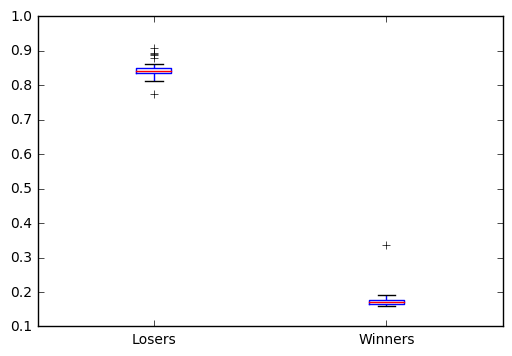

Clearly our regression is weighted towards predicting losers
Ttest_indResult(statistic=92.155307915895719, pvalue=5.1355251477496232e-97)
Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend


In [240]:
# gets the prediction strength for each row in Test set
# sorts predictions by class and box plots them
strengths = logreg.predict_proba(XTest)
strengthsSorted = [[],[]]
for strenM, out in zip (strengths,YTest):
    strengthsSorted[out].append(strenM[out])
# print(strengthsSorted)
plt.boxplot(strengthsSorted, labels=["Losers", "Winners"])
plt.show()
ttestres = stats.ttest_ind(strengthsSorted[0], strengthsSorted[1])
print("Clearly our regression is weighted towards predicting losers")
print(ttestres)
print("Perhaps this is simply because losers occur more frequently and we dont have enough data to counter act this trend")

In [241]:
# these are the weights for the models inputs
for l,v in zip(used_fields, logreg.coef_[0]):
    print(l+ ": " + str(v))
print("intercept: %s" % logreg.intercept_[0])

# output for analysis file
# print([[l,v] for l,v in zip(used_fields, logreg.coef_[0])])

IMDB Rating: -0.389694476037
IMDB Votes: 0.911020345235
Average Critic Score: 0.485770790826
Average Audience Score: -0.554593055223
Production Budget: -0.0818743589545
Worldwide Gross: 0.919771238207
Return on Investment: 1.35492740729
intercept: -1.83132659683


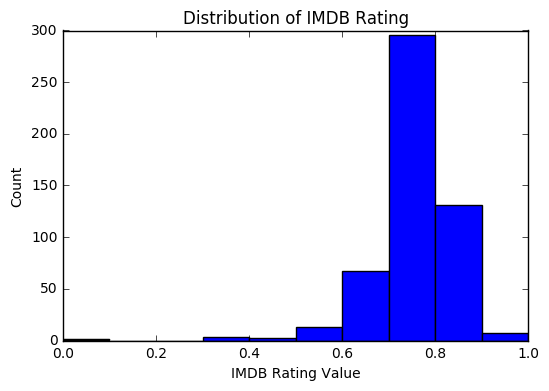

IMDB Rating
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.753538461538
Median: 0.76
Standard Dev: 0.078638525873






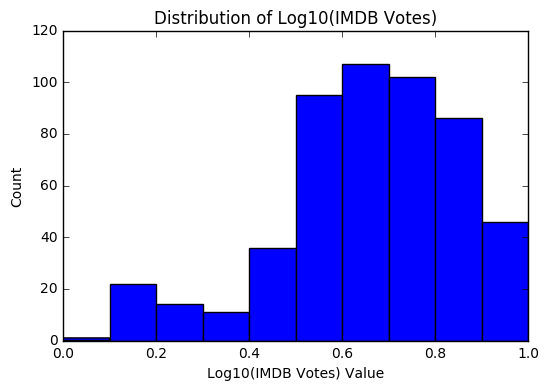

Log10(IMDB Votes)
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.658613517697
Median: 0.670723214301
Standard Dev: 0.194954861745






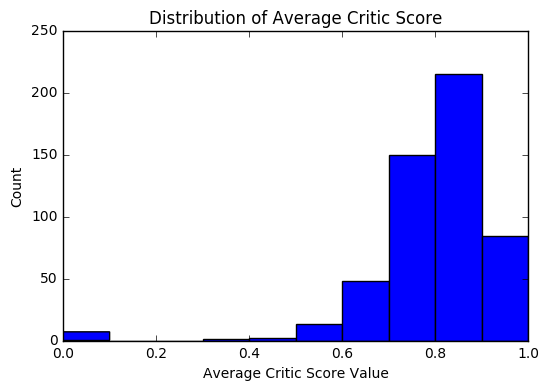

Average Critic Score
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.799412955466
Median: 0.821052631579
Standard Dev: 0.134068260465






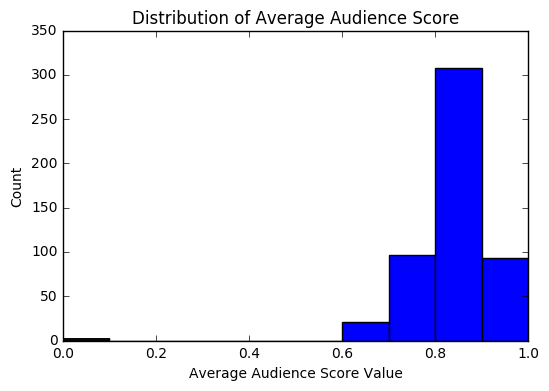

Average Audience Score
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.831239316239
Median: 0.844444444444
Standard Dev: 0.0865580224806






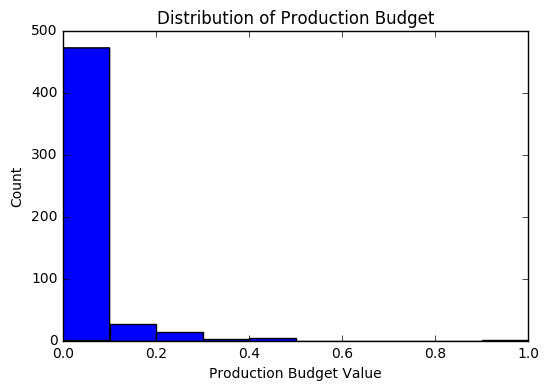

Production Budget
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.0331335125158
Median: 7.06588235294e-05
Standard Dev: 0.0791196581656






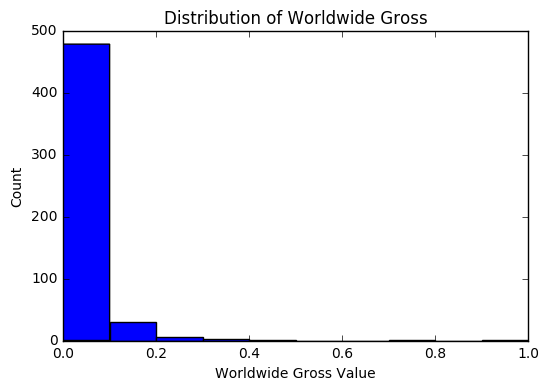

Worldwide Gross
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.0297817704119
Median: 0.0
Standard Dev: 0.0764052734994






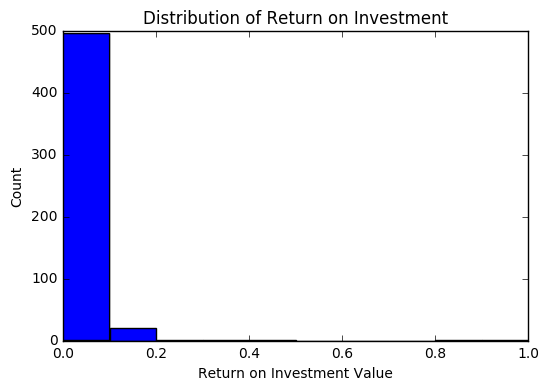

Return on Investment
Observations: 520
Min: 0.0
Max: 1.0
Mean: 0.0217679461626
Median: 0.0
Standard Dev: 0.0669109055475






In [250]:
# prints descriptive statistics for the features
inputArrs = list(np.array(X).T)

for i,arr in enumerate(inputArrs):
    name = None
    if i != 1:
        name = used_fields[i]
    else:
        name = "Log10(%s)" % used_fields[i].strip()
    plt.hist(arr, label=used_fields[i], range=(0, 1))
    plt.title("Distribution of %s" % name)
    plt.ylabel('Count')
    plt.xlabel('%s Value' % name)
    plt.show()
    desc = stats.describe(arr)
    print(name)
    print("Observations: %s" % desc.nobs)
    print("Min: %s" % desc.minmax[0])
    print("Max: %s" % desc.minmax[1])
    print("Mean: %s" % desc.mean)
    print("Median: %s" % np.median(arr))
    print("Standard Dev: %s" % np.std(arr))
    print("\n")
    print("\n")